In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [ ]:

df.shape

(1201, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [ ]:
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))


Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [ ]:

import datetime
datetime.datetime.now().year

2021

# Creating a column by name total year having the difference of year

In [ ]:
df['Total Years']=datetime.datetime.now().year-df['YearBuilt']


Droping the YearBuilt column

In [ ]:
df.drop("YearBuilt",axis=1,inplace=True)

In [ ]:
# Checking columns name
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

1. Collecting categorical feature

2. Categorical Embedding

In [ ]:
cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature="SalePrice"


# Applying label coding to the categorical features

In [ ]:

from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"]=LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0])

In [ ]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,18
1,0,3,80.0,9600,1,3,1262,0,181500,45
2,5,3,68.0,11250,1,0,920,866,223500,20
3,6,3,60.0,9550,1,0,961,756,140000,106
4,5,3,84.0,14260,1,0,1145,1053,250000,21


In [ ]:
import numpy as np

# Stacking and Converting Into numpy

In [ ]:
### Stacking and Converting Into Tensors
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

## Converting categorical features into tensors

In [ ]:
### Convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

# Note : Categorical feature never be conveted into float

In [ ]:
# create continuous variable
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [ ]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

# Converting our continuos varibale to in numpy

In [ ]:

### Stacking continuous variable to a tensor
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    18.],
        [   80.,  9600.,  1262.,     0.,    45.],
        [   68., 11250.,   920.,   866.,    20.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    80.],
        [   68.,  9717.,  1078.,     0.,    71.],
        [   75.,  9937.,  1256.,     0.,    56.]])

In [ ]:

cont_values.dtype

torch.float32

In [ ]:
### Dependent Feature 
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int64  
 5   LotShape     1201 non-null   int64  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 103.2 KB


# Let us confirm the the features

In [ ]:

cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [ ]:

len(df['MSSubClass'].unique())

15

# Embedding Size For Categorical columns

> Remember this embedding layer is only created for categorical features

> storing length of as it will help in our embedding i.e that be input layer

> this unique lenght we get is our input dimension

In [ ]:
#### Embedding Size For Categorical columns
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]

In [ ]:

cat_dims

[15, 5, 2, 4]

# Output dimension

Thumb Rule:

> The output dimension should we set is based on the input dimension(min(50, > > feature dimension/2))

> This is how the output of the embedding layer will be selected



In [ ]:

embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]

In [ ]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [ ]:

cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [ ]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [ ]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [ ]:

embedding_val

[tensor([[ 0.5291,  2.1352, -1.1545,  ..., -1.3367,  0.5125, -0.2596],
         [-0.0036, -0.6619,  0.2202,  ..., -0.5914, -1.6579, -1.7465],
         [ 0.5291,  2.1352, -1.1545,  ..., -1.3367,  0.5125, -0.2596],
         ...,
         [-0.2058,  1.2962,  1.6511,  ..., -0.8992,  1.6958, -0.7061],
         [-0.0036, -0.6619,  0.2202,  ..., -0.5914, -1.6579, -1.7465],
         [-0.0036, -0.6619,  0.2202,  ..., -0.5914, -1.6579, -1.7465]],
        grad_fn=<EmbeddingBackward>), tensor([[ 2.0333,  0.7882, -0.1276],
         [ 2.0333,  0.7882, -0.1276],
         [ 2.0333,  0.7882, -0.1276],
         ...,
         [ 2.0333,  0.7882, -0.1276],
         [ 2.0333,  0.7882, -0.1276],
         [ 2.0333,  0.7882, -0.1276]], grad_fn=<EmbeddingBackward>), tensor([[-1.5076],
         [-1.5076],
         [-1.5076],
         ...,
         [-1.5076],
         [-1.5076],
         [-1.5076]], grad_fn=<EmbeddingBackward>), tensor([[ 1.2271,  0.3794],
         [ 1.2271,  0.3794],
         [ 0.1378, -0.3481],

In [ ]:

z = torch.cat(embedding_val, 1)
z

tensor([[ 0.5291,  2.1352, -1.1545,  ..., -1.5076,  1.2271,  0.3794],
        [-0.0036, -0.6619,  0.2202,  ..., -1.5076,  1.2271,  0.3794],
        [ 0.5291,  2.1352, -1.1545,  ..., -1.5076,  0.1378, -0.3481],
        ...,
        [-0.2058,  1.2962,  1.6511,  ..., -1.5076,  1.2271,  0.3794],
        [-0.0036, -0.6619,  0.2202,  ..., -1.5076,  1.2271,  0.3794],
        [-0.0036, -0.6619,  0.2202,  ..., -1.5076,  1.2271,  0.3794]],
       grad_fn=<CatBackward>)

In [ ]:
#### Implement dropupout
droput=nn.Dropout(.4)

In [ ]:
final_embed=droput(z)
final_embed

tensor([[ 0.8818,  3.5587, -1.9242,  ..., -0.0000,  2.0451,  0.0000],
        [-0.0000, -0.0000,  0.0000,  ..., -0.0000,  2.0451,  0.0000],
        [ 0.0000,  3.5587, -1.9242,  ..., -2.5127,  0.2296, -0.5802],
        ...,
        [-0.3429,  2.1603,  2.7519,  ..., -2.5127,  0.0000,  0.6323],
        [-0.0060, -1.1031,  0.3669,  ..., -2.5127,  2.0451,  0.6323],
        [-0.0060, -1.1031,  0.0000,  ..., -0.0000,  2.0451,  0.0000]],
       grad_fn=<MulBackward0>)

# Create a Feed Forward Neural Network

In [ ]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [ ]:
len(cont_features)

5

In [ ]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)



# this this we provide: embedding dimension, lenght of continous featuer, out as 1 , and creating two hidden neuron i.e of 100 nad 50 neuron and droupout ratio as 40%
# to avoid overfitting

# Let us check our model

In [ ]:

model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)


Define Loss And Optimizer

In [ ]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
df.shape

(1201, 10)

In [ ]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    18.],
        [   80.,  9600.,  1262.,     0.,    45.],
        [   68., 11250.,   920.,   866.,    20.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    80.],
        [   68.,  9717.,  1078.,     0.,    71.],
        [   75.,  9937.,  1256.,     0.,    56.]])

In [ ]:
cont_values.shape

torch.Size([1201, 5])

# Creating our training and testing data

In [ ]:
batch_size=1200     ## total size of all data
test_size=int(batch_size*0.15)  # created a test size i.e 15% of the total bathch size will be my 
train_categorical=cat_features[:batch_size-test_size]  ## preparing our train data on categorical feature  
test_categorical=cat_features[batch_size-test_size:batch_size]  # # testing data over categorical feature
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [ ]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [ ]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.75
Epoch number: 11 and the loss : 200493.46875
Epoch number: 21 and the loss : 200489.140625
Epoch number: 31 and the loss : 200482.640625
Epoch number: 41 and the loss : 200473.25
Epoch number: 51 and the loss : 200461.375
Epoch number: 61 and the loss : 200446.40625
Epoch number: 71 and the loss : 200429.359375
Epoch number: 81 and the loss : 200408.0
Epoch number: 91 and the loss : 200383.421875
Epoch number: 101 and the loss : 200355.3125
Epoch number: 111 and the loss : 200322.125
Epoch number: 121 and the loss : 200291.4375
Epoch number: 131 and the loss : 200252.015625
Epoch number: 141 and the loss : 200206.609375
Epoch number: 151 and the loss : 200162.234375
Epoch number: 161 and the loss : 200112.265625
Epoch number: 171 and the loss : 200059.734375
Epoch number: 181 and the loss : 200005.828125
Epoch number: 191 and the loss : 199946.140625
Epoch number: 201 and the loss : 199881.53125
Epoch number: 211 and the loss : 199815.609375
Epo

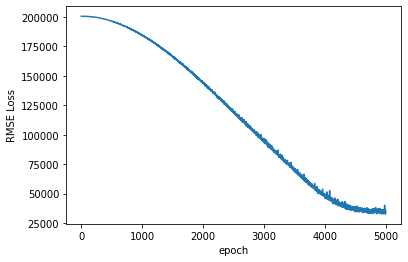

In [ ]:
# Ploting graph
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [ ]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 45620.85546875


In [ ]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [ ]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [ ]:

data_predicted

,Prediction
0,102544.210938
1,205973.828125
2,142739.906250
3,186747.156250
4,210641.171875
5,201388.562500
6,144279.546875
7,298622.218750
8,155926.906250
9,378212.718750


In [ ]:
# creating 

final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,102544.210938,27455.789062
1,138887.0,205973.828125,-67086.828125
2,175500.0,142739.906250,32760.093750
3,195000.0,186747.156250,8252.843750
4,142500.0,210641.171875,-68141.171875


In [ ]:
#### Saving The Model
#### Save the model
torch.save(model,'HousePrice.pt')

In [ ]:
torch.save(model.state_dict(),'HouseWeights.pt') # this saves the weights of model

In [ ]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [ ]:

model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [ ]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)